# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ 1 ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ 2 ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ 3 ] Visualize a few images from the dataset to understand what the data looks like.

In [41]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [42]:
# Inspect the shapes of the datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape



((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [43]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

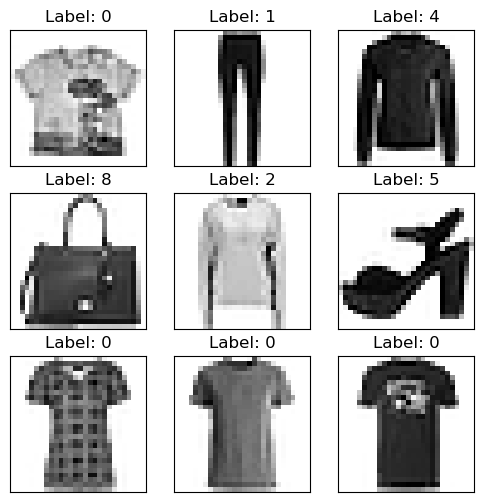

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Verify the data looks as expected

# Selecting 9 random indices
random_indices = np.random.choice(len(X_test), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {y_test[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


In [45]:
# Print the class names for the Fashion MNIST labels
print("class_names, label mapping:")
for idx, name in enumerate(class_names):
    print(f"{idx}: {name}")

class_names, label mapping:
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot


Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**
Looks as expected. No issues. there are 10 categories and at most there will be 9 of the categories displayed at any one time. this can be changed by plt.subplots(2,5) or similar.

In [46]:
import tensorflow as tf;

from tensorflow.keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f'After one-hot encoding: {y_train[0]}')

Before one-hot encoding: 9
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from numpy import random
import tensorflow as tf
from keras.layers import Input

# Create a simple linear regression model
model = Sequential()


# You can use `model.add(<layer>)` to add layers to the model
model.add(Input(shape=(28,28)))  # Input tensor specifying the shape
model.add(Flatten())  # flatten to convert 2D to 1D
model.add(Dense(64, activation='relu'))  # 64 neurons, ReLU activation
# Output layer
model.add(Dense(10, activation='softmax'))  # 10 neurons, softmax activation

model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_20 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Compile the model using `model.compile()`
model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='sgd', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)
# Train the model with `model.fit()`
model.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=5, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)
# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6502 - loss: 1.1193 - val_accuracy: 0.7899 - val_loss: 0.6015
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8109 - loss: 0.5611 - val_accuracy: 0.8169 - val_loss: 0.5276
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8268 - loss: 0.5078 - val_accuracy: 0.8348 - val_loss: 0.4758
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8429 - loss: 0.4581 - val_accuracy: 0.8376 - val_loss: 0.4674
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8459 - loss: 0.4462 - val_accuracy: 0.8440 - val_loss: 0.4437
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8420 - loss: 0.4582
Loss:     0.47
Accuracy: 83.73%


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**: This is a decent first result. Linear Regression is simple with an assumption that a linear rleationship between features exists. In thi case the relatively good results is expected because the images are fairly simple. I will run another test to see if i get similar results

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create baseline linear regression model
baseline_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 1D vectors
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

c:\Users\karma\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:

# Compile the model
baseline_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
baseline_model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:

# Train the baseline model
history_baseline = baseline_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6550 - loss: 1.0561 - val_accuracy: 0.8127 - val_loss: 0.5703
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8211 - loss: 0.5495 - val_accuracy: 0.8252 - val_loss: 0.5122
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8345 - loss: 0.4909 - val_accuracy: 0.8392 - val_loss: 0.4798
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8426 - loss: 0.4725 - val_accuracy: 0.8428 - val_loss: 0.4615
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8490 - loss: 0.4421 - val_accuracy: 0.8457 - val_loss: 0.4518
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8499 - loss: 0.4403 - val_accuracy: 0.8465 - val_loss: 0.4406
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8545 - loss: 0.4284 - val_accuracy: 0.8499 - val_loss: 0.4348
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8543 - loss: 0.4240 - val_accuracy: 0.

In [52]:
# Evaluate on test set
loss, accuracy = baseline_model.evaluate(X_test, y_test)
print(f"\nBaseline Model Loss: {loss:.2f}")
print(f"\nBaseline Model Accuracy: {accuracy*100:2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8442 - loss: 0.4423

Baseline Model Loss: 0.46

Baseline Model Accuracy: 83.920002%


# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [53]:
#!pip install tensorflow

In [54]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

# Reshape the data to include the channel dimension
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
cnn_model = Sequential([
    #input layer
    Input(shape=(28, 28, 1)),
    #hidden layers
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

# Compile the CNN model
cnn_model.compile(
    optimizer='adam',   # Optimizer
    loss='categorical_crossentropy',  # Loss function
    # SGD(learning_rate = 0.0001, momentum = 0.9),
    metrics=['accuracy'] # Metrics to evaluate the model
)

cnn_model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Train the model
history_cnn = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.6449 - loss: 0.9976 - val_accuracy: 0.8377 - val_loss: 0.4385
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8251 - loss: 0.4806 - val_accuracy: 0.8692 - val_loss: 0.3649
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8514 - loss: 0.4080 - val_accuracy: 0.8718 - val_loss: 0.3476
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8669 - loss: 0.3692 - val_accuracy: 0.8840 - val_loss: 0.3125
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8767 - loss: 0.3407 - val_accuracy: 0.8868 - val_loss: 0.3052


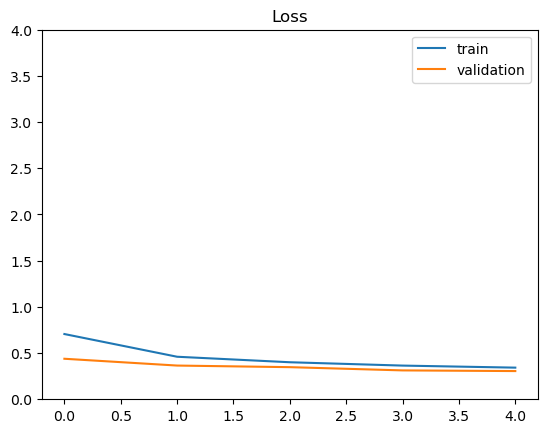

In [56]:
plt.plot(history_cnn.history['loss'], label='train')
plt.plot(history_cnn.history['val_loss'], label='validation')
plt.ylim(0, 4)
plt.legend(loc='best')
plt.title('Loss');

In [57]:
4# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test_cnn, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8842 - loss: 0.3205
Loss:     0.32
Accuracy: 88.26%


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**
~4% improvement with adam oprimizer and 2 additional Conv2D Layers added. The additional layers are great for non linear relationships. in the case where two objects are similar but not the same. this model perfoms better at distiguishing especially that we have sweatshirts and shirts that may pass for linear regression but higher llikely for differentiation with more sophisticated CNN model. The sofistiaction is still limited in that it is too complex a model for a small dataset

# 4. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [58]:
# A. Test Hyperparameters 

results_history = {}
results_loss = {}
results_accuracy = {}

# Test filters in: 10, 32, 64, 128
for filter_size in [10, 32, 64, 128]:
    # Create a simple CNN model
    model = Sequential()
    model.add(Input((28, 28, 1)))
    model.add(Conv2D(filters=filter_size, kernel_size=(5, 5)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation="softmax"))
    model.compile(
        loss='categorical_crossentropy',  # Loss function
        optimizer='sgd',                  # Optimizer
        metrics=['accuracy']              # Metrics to evaluate the model
    )
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=5, batch_size=32, validation_split=0.2
    )
    results_history[f'filter_size_{filter_size}'] = history

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    results_loss[f'filter_size_{filter_size}'] = loss
    results_accuracy[f'filter_size_{filter_size}'] = accuracy

print("accuracy values on test set: ", results_accuracy)
print("loss values on test set: ", results_loss)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7101 - loss: 0.8454 - val_accuracy: 0.8250 - val_loss: 0.4972
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8337 - loss: 0.4637 - val_accuracy: 0.8478 - val_loss: 0.4216
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8589 - loss: 0.4006 - val_accuracy: 0.8598 - val_loss: 0.3953
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8679 - loss: 0.3678 - val_accuracy: 0.8618 - val_loss: 0.3818
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8787 - loss: 0.3399 - val_accuracy: 0.8725 - val_loss: 0.3597
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8827 - loss: 0.3251 - val_accuracy: 0.8752 - val_loss: 0.3433
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8872 - loss: 0.3152 - val_accuracy: 0.8761 - val_loss: 0.3370
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8894 - loss: 0.3028 - 

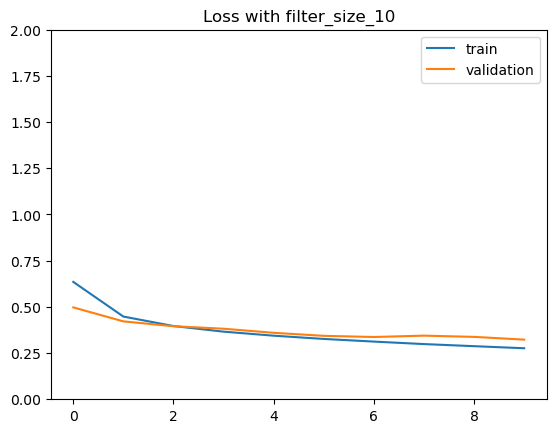

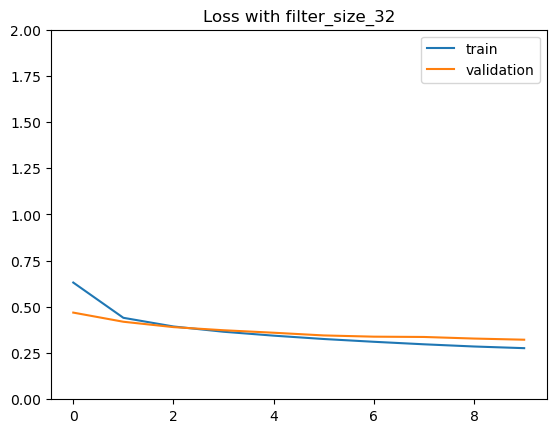

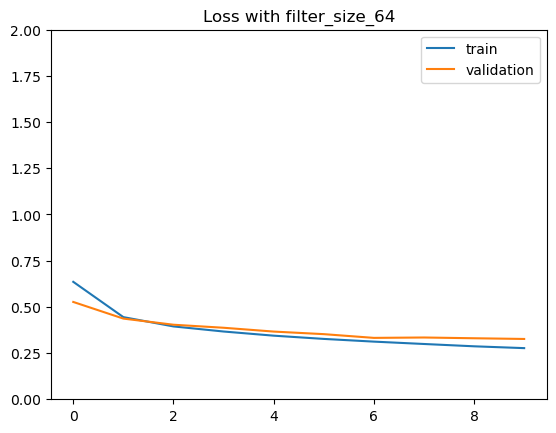

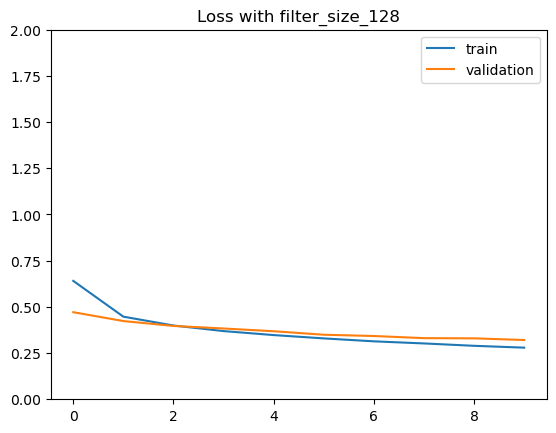

In [59]:
# B. Test presence or absence of regularization ()


for key in results_history.keys():
    history = results_history[key]
    #print(history)
    plt.figure()
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.ylim(0, 2)
    plt.legend(loc='best')
    plt.title('Loss with '+ key)

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

Test accuracy is highest for 64 filters (≈87.9%), but differences are minor

Adding more filters above 10 does not yield significant improvement for this shallow architecture and Fashion MNIST.

Model capacity is sufficient even with a small number of filters; more complex patterns or regularization might be needed for tougher datasets.

Optimal choice: 64 filters is marginally best, but any setting from 10 to 128 works similarly for this setup.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6932 - loss: 0.8879 - val_accuracy: 0.8139 - val_loss: 0.5226
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8313 - loss: 0.4790 - val_accuracy: 0.8324 - val_loss: 0.4641
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8497 - loss: 0.4251 - val_accuracy: 0.8524 - val_loss: 0.4130
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8629 - loss: 0.3857 - val_accuracy: 0.8637 - val_loss: 0.3776
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8739 - loss: 0.3560 - val_accuracy: 0.8739 - val_loss: 0.3526
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8789 - loss: 0.3369 - val_accuracy: 0.8751 - val_loss: 0.3486
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8829 - loss: 0.3235 - val_accuracy: 0.8740 - val_loss: 0.3418
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8889 -

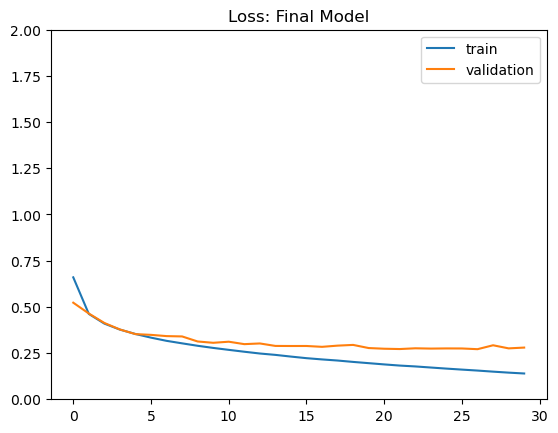

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8984 - loss: 0.3050
Final Loss: 0.30
Final Accuracy: 90.05%


In [39]:
# 5. Training Final Model and Evaluation

filter_size = 32
include_regularization = False

model = Sequential()
model.add(Input((28, 28, 1)))
model.add(Conv2D(filters=filter_size, kernel_size=(5, 5), activation='relu'))
if include_regularization:
    model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
if include_regularization:
    model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)
history = model.fit(
    X_train, y_train,
    epochs=30, batch_size=32, validation_split=0.2
)

plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0, 2)
plt.legend(loc='best')
plt.title('Loss: Final Model')
plt.show()

# Final test evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Final Loss: {loss:.2f}')
print(f'Final Accuracy: {accuracy * 100:.2f}%')


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

Improvement by 6% after 30 epochs
Filter size 32  without dropout regularization. shows best results. Filter increases did not improve significant results
with more time I would experiment with additional conv layers deeper networks and try a different regulariation technique possibly.



🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.